In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding= 'ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Improvements (Depends upon the evaluations)
- Deploy

## Data Cleaning


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
## As there are very less value presents and null values are greater
data.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace=True)

In [6]:
data.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
## label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
## This is to convert the spam and not spam as the binary code
data['target'] =  encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().head()

,target,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [10]:
## Check for duplicate values
data.duplicated().sum()
## No of duplicate values

403

In [11]:
data = data.drop_duplicates(keep="first")
data.duplicated().sum()

0

## EDA (Exploratory Data Analysis)

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

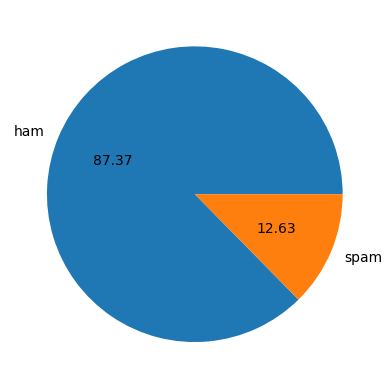

In [14]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts() , labels=['ham' , 'spam'] , autopct="%0.2f");

In [15]:
## Data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data['num_characters'] = data['text'].apply(len)
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# num of words
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
data[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
data[data['target']==0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
data[data['target']==1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

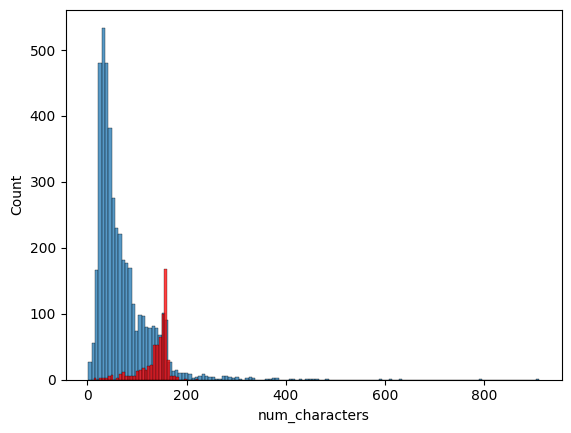

In [23]:
spam = data[data['target']==0]['num_characters']
correct = data[data['target']==1]['num_characters']
plt.Figure(figsize=(12,8))
sns.histplot(spam)
sns.histplot(correct , color="red")

<AxesSubplot: xlabel='num_words', ylabel='Count'>

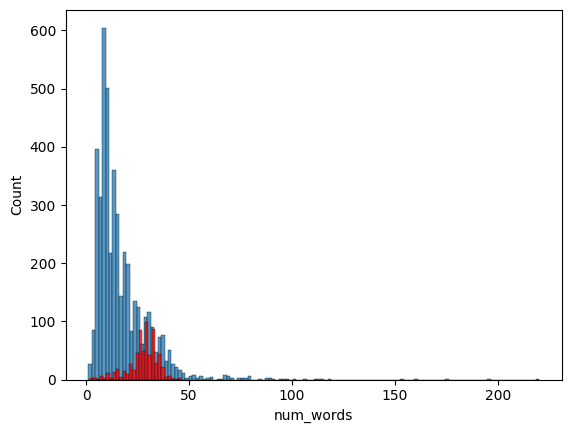

In [24]:
spam = data[data['target']==0]['num_words']
correct = data[data['target']==1]['num_words']
plt.Figure(figsize=(12,8))
sns.histplot(spam)
sns.histplot(correct , color="red")

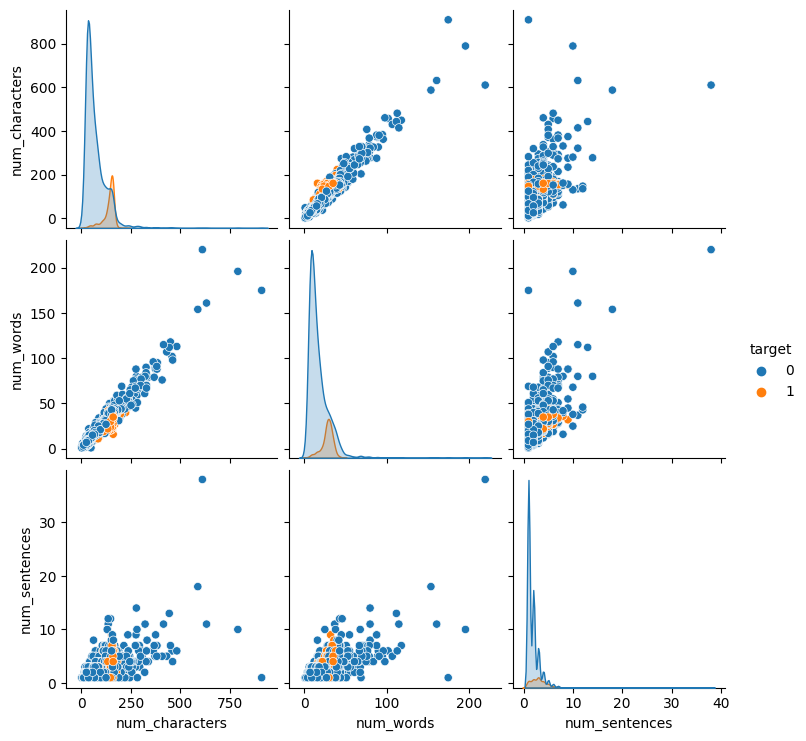

In [25]:
# Outliers exist hai
sns.pairplot(data,hue='target')

C:\Users\prans\AppData\Local\Temp\ipykernel_36660\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

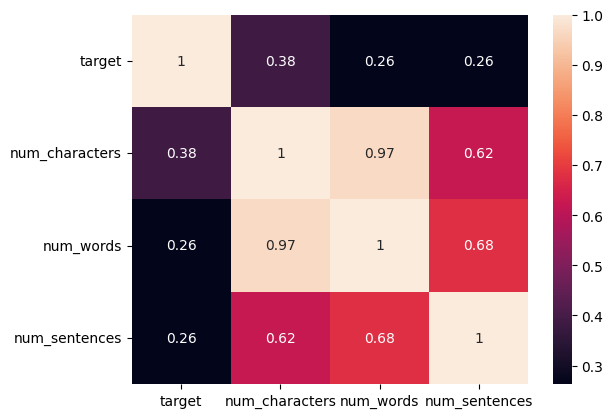

In [26]:
sns.heatmap(data.corr(),annot=True)

## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [27]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string
nltk.download('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:];
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [29]:
transform_text('Hi How are you% tt!')

'hi tt'

In [30]:
data['transformed_text'] = data['text'].apply(transform_text)


In [31]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
# For detecting the spam messages what words are promidient use 
# spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

# ham words used
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

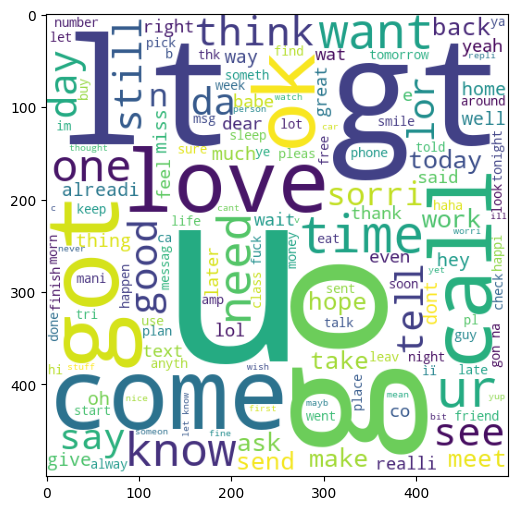

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [63]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(spam_corpus)

9939

In [65]:
from collections import Counter
spam_words_pd  = pd.DataFrame(Counter(spam_corpus).most_common(30))
ham_words_pd  = pd.DataFrame(Counter(ham_corpus).most_common(30))

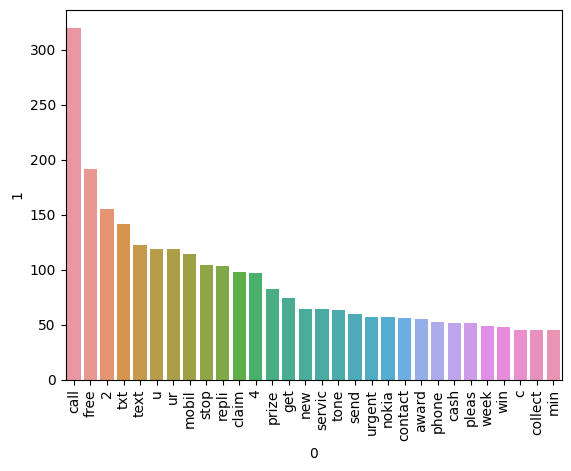

In [62]:
sns.barplot(x=spam_words_pd[0] , y=spam_words_pd[1])
plt.xticks(rotation='vertical')
plt.show()

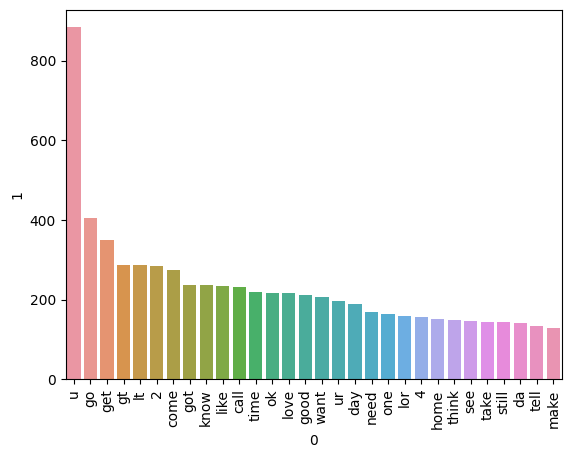

In [66]:
sns.barplot(x=ham_words_pd[0] , y=ham_words_pd[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building